# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I encourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
#vectorization is not writing for loops
#Several wasy to loop without a for loop
#df['column'] = df.apply('row')
#np.where(
#df['column'] == 'None',
#df['current_status'],
#'NA')

#df['status'] = np.where()

#np.where(
#df['column'].values == 'None',
#df['current_status'].values,
#df['status_at_lead_time].value)

#df['status'] = np.where(''')

#numpy.vectortize 
#numpy.select for multiple conditons

#conditions = [
# df['date_col1'] == df['date_col2'],
# df['norm_status'].strartwith('CLI'),
# df['norm_status'].isin(multi_touch_leads),
# df['norm_status'].isin(eng_multi_leads)
# ]

#choices =[
# 'New Lead',
# 'Client Lead',
# 'MTouch Lead',
# 'EMTouch Lead'
# ]

#>>>> df['leadcat'] = np.select(codnitons, choices, dafault = 'NA')


#Chain conditions together 
##conditions = [
# ((df['Inactive'] == 'No' ) & (df['Providers'] == 0),
# ((df['Inactive'] == 'No' ) & (df['Providers'] < 5),
# df['Inactive'] == 'No',
# df['duplicate_leads'],
# df['bad_leads'],
# ]

#choices =[
# 'active_no_providers',
# 'active_small',
# 'active_normal',
# 'is_dup',
# 'active_bad',
# ]

#>>>> df['lead_type'] = np.select(codnitons, choices, dafault = 'NA')


# Strings
# condtions = [
# df['Lead Source'].str.contains9r'non.*?paid', na=False),
# df['Lead Source'].str.contains(r'Buyerzone|^paid\s+', na=False')
#]

#choices = ['non-paid, 'paid]

#df['is_paid'] = np.select(conditions, choices, default ='NA')


#Dictionary lookups

# df['dict_loopup1'] = np.where(
#     df['Providers'] > 7,
#     'Upmarket',
#     df['Catergory'].map(channel_dict))
# )

#Dates
# .dt accesor
# X = np.where(df['Start Date'].isnull().values,
#      (df['Original Date Created'].values - df['Date Created']).dt.days /7,
#      (df['Date Created'].values - df['Start Date']).dt.days / 7)

# df['weeks_to_completed1'] = x




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [3]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

#index_col = 0 calls the index column zero if unnamed 

/Users/astroraf/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df['ALCDAY5'].value_counts()

888.0    13043
201.0     3027
202.0     2324
101.0     1596
203.0     1350
102.0     1232
230.0     1164
205.0     1156
204.0     1144
210.0      840
103.0      782
107.0      710
220.0      650
215.0      590
206.0      389
104.0      386
208.0      369
105.0      352
207.0      278
225.0      265
777.0      225
999.0      201
212.0      144
106.0      109
228.0       56
214.0       53
229.0       31
209.0       28
227.0       24
218.0       19
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [5]:
df.rename(columns={'_STATE': 'State', 'PHYSHLTH':'Phys_hlth','SMOKDAY2': 'smoking'}, inplace = True)
#Rename columns for understanding 

In [6]:
conditions = [df['State'] == 9.0, df['State'] == 34.0, df['State'] == 36.0]
choices = ['Conneticut', 'New Jersey', 'New York']
df['State'] = np.select(conditions, choices, default ='NA')

#clean up the columns names from float value to string values for each state

In [7]:
df['Phys_hlth'].value_counts()

# 

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: Phys_hlth, dtype: int64

In [8]:
#df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 99.0 , 0, df['PHYSHLTH'])
#Go back and replace with average

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [9]:
pd.set_option('display.max_columns', 360)


In [10]:
# your code here
df[df['State'].isin([9,34,36])]

,State,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,Phys_hlth,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,smoking,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3


Now check to see how large our subset df.

In [11]:
# your code here
df.count()

State       34545
FMONTH      34545
IDATE       34545
IMONTH      34545
IDAY        34545
            ...  
_RFSEAT2    34545
_RFSEAT3    34545
_FLSHOT6    12211
_PNEUMO2    12211
_AIDTST3    30772
Length: 358, dtype: int64

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [12]:
df['Phys_hlth'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: Phys_hlth, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [13]:
df['Phys_hlth'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: Phys_hlth, dtype: int64

In [14]:
df = df[(df['Phys_hlth']!= 99.0) & 
        (df['Phys_hlth']!= 77.0)] 

#Assings the dataframe without the 99 and 77 values that are
#for 


df['Phys_hlth'] = np.where(df['Phys_hlth'] == 88.0 , 0, df['Phys_hlth'])

In [15]:
mean_hlth = df[df['Phys_hlth']<= 30]['Phys_hlth'].mean()

mean_hlth

4.085340919192817

In [16]:
# df['PHYSHLTH'] = np.where(df['PHYSHLTH'] == 77.0 , mean_hlth, df['PHYSHLTH']) #77 with average

In [17]:
df['Phys_hlth'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: Phys_hlth, dtype: int64

In [18]:
#your code here
# 88 to 0 

df['Phys_hlth'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: Phys_hlth, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [19]:
# descriptive statistics
df.describe()

,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,Phys_hlth,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,smoking,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,33747.000000,3.374700e+04,33747.000000,33747.000000,33747.000000,33747.000000,3.374700e+04,3.374700e+04,18080.0,18080.000000,8.0,18080.0,18080.000000,8.000000,18073.000000,18077.000000,18077.000000,15667.0,15667.0,15667.0,15667.000000,15667.000000,93.0,15667.000000,15666.000000,11644.000000,33747.000000,33747.000000,33747.000000,17330.000000,33747.000000,33747.000000,33747.000000,33747.000000,33747.000000,12831.000000,33747.000000,32316.000000,12089.000000,33747.000000,33747.000000,33747.000000,33747.000000,4662.000000,33747.000000,33747.000000,33747.000000,33747.000000,33747.000000,33747.000000,33747.000000,4205.000000,10342.000000,10342.000000,10342.000000,10342.000000,33747.000000,33747.000000,33747.000000,33747.000000,18079.000000,1259.000000,18080.000000,33747.000000,33747.000000,33747.000000,33443.000000,33332.000000,33198.000000,33126.000000,5974.000000,32739.000000,32651.000000,32578.000000,32517.000000,3248

In [20]:
df['Phys_hlth'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: Phys_hlth, dtype: float64

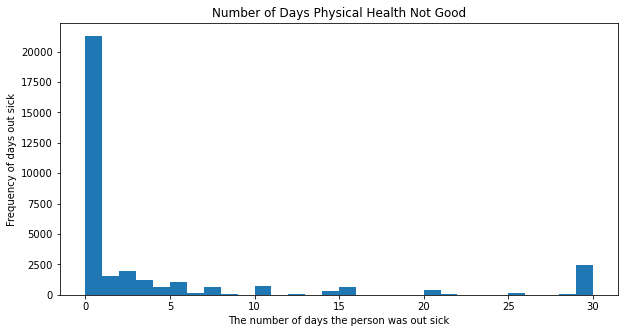

In [21]:
# graphic the distribution of data
fig, ax = plt.subplots(figsize =(10,5))

ax.hist(df['Phys_hlth'], bins = 30)
ax.set_xlabel('The number of days the person was out sick')
ax.set_ylabel('Frequency of days out sick')
ax.set_title('Number of Days Physical Health Not Good')

plt.show();


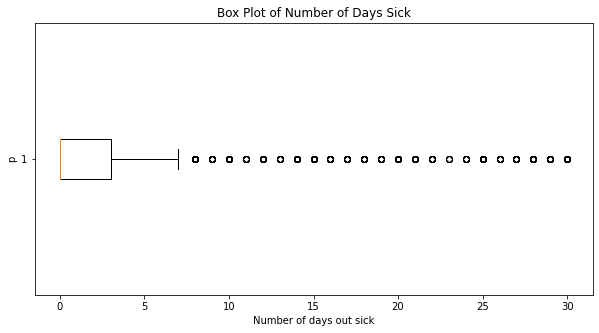

In [22]:
# code to calculate the average number of sick days by state
fig, ax = plt.subplots(figsize = (10,5))

ax.boxplot(df['Phys_hlth'], vert = False)
ax.set_xlabel('Number of days out sick')
ax.set_ylabel('p')
ax.set_title('Box Plot of Number of Days Sick')

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [23]:
st_means = df.groupby('State')['Phys_hlth'].mean()
st_means

State
Conneticut    3.688562
New Jersey    4.380957
New York      4.148030
Name: Phys_hlth, dtype: float64

In [24]:
# conditions = [df['State'] == 9.0, df['State'] == 34.0, df['State'] == 36.0]
# choices = ['Conneticut', 'New Jersey', 'New York']
# df['State'] = np.select(conditions, choices, default ='NA')

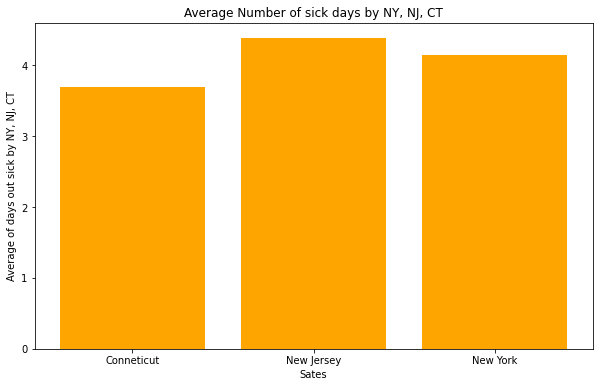

In [25]:
# code to graph those averages using matplotlib

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(st_means.index, st_means.values, align = 'center', color ='orange')
ax.set_xlabel('Sates')
ax.set_ylabel('Average of days out sick by NY, NJ, CT')
ax.set_title('Average Number of sick days by NY, NJ, CT')

plt.show()

In [26]:
ct = df.loc[df['State'] == 'Conneticut', ['Phys_hlth']] #loc slice a dataframe with conditions 
ny = df.loc[df['State'] == 'New York', ['Phys_hlth']]
nj = df.loc[df['State'] == 'New Jersey', ['Phys_hlth']]

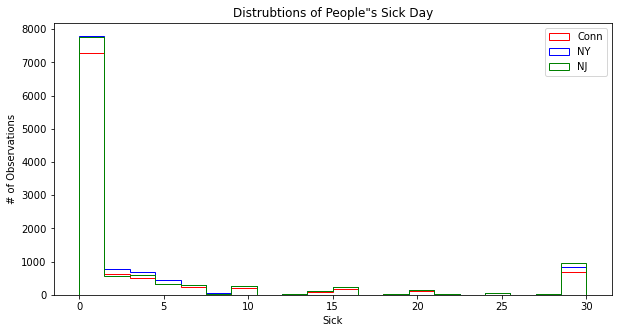

In [27]:
# graphic showing the histogram of data
fig, ax = plt.subplots(figsize =(10,5))

ax.hist(ct, bins = 20, label = 'Conn', histtype='step', color ='r')
ax.hist(ny, bins = 20, label = 'NY',  histtype='step', color ='b')
ax.hist(nj, bins = 20, label = 'NJ', histtype='step', color ='g')


ax.set_xlabel('Sick')
ax.set_ylabel('# of Observations')
ax.set_title('Distrubtions of People"s Sick Day')
ax.legend()
plt.show();



## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [28]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['Phys_hlth']>8, 1, 0)

df['chron'].value_counts()

0    28655
1     5092
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [29]:
chron_sick = df.groupby('State')['chron'].value_counts(normalize=True).loc[:,1]#*100
#Group by state and state and chronically ill, normalize the value count then slice the dataframe with a specific condition 

In [30]:
chron_sick

State
Conneticut    0.135696
New Jersey    0.162681
New York      0.152829
Name: chron, dtype: float64

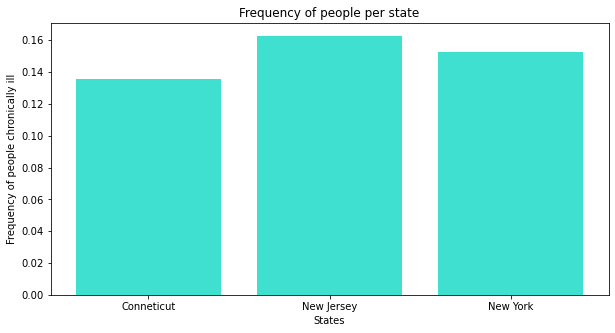

In [31]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots(figsize = (10,5))

ax.bar(st_means.index, chron_sick.values, align = 'center', color = 'turquoise')



# Set the y-axis label
ax.set_xlabel('States')
ax.set_ylabel('Frequency of people chronically ill')
ax.set_title('Frequency of people per state')

plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [32]:
df['smoking'].isna()

49938      True
49939      True
49940      True
49941      True
49942     False
          ...  
303774    False
303775     True
303776    False
303777     True
303778     True
Name: smoking, Length: 33747, dtype: bool

In [33]:
#Look up smokeday2 from notebook
df['smoking'].shape

(33747,)

In [34]:
df = df[~df.smoking.isna()]
#~ means not: turns all trues and turns them to false and vice versa

In [35]:
df['smoking'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: smoking, dtype: int64

In [36]:
df['smoking'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: smoking, dtype: int64

In [37]:
conditions = [df['smoking'] == 1.0, 
              df['smoking'] == 2.0, 
              df['smoking'] == 3.0, 
              df['smoking'] == 7.0, 
              df['smoking'] == 9.0]

choices = ['Every Day', 
           'Some Days', 
           'None-Smoker', 
           'Not Sure', 
           'Refused']

df['smoking'] = np.select(conditions, choices, default ='NA')

In [38]:
df['smoking']

49942     None-Smoker
49944     None-Smoker
49946     None-Smoker
49951     None-Smoker
49954     None-Smoker
             ...     
303768    None-Smoker
303769    None-Smoker
303773    None-Smoker
303774      Every Day
303776    None-Smoker
Name: smoking, Length: 13468, dtype: object

In [39]:
pct_smoking = df['smoking'].value_counts(normalize=True)*100

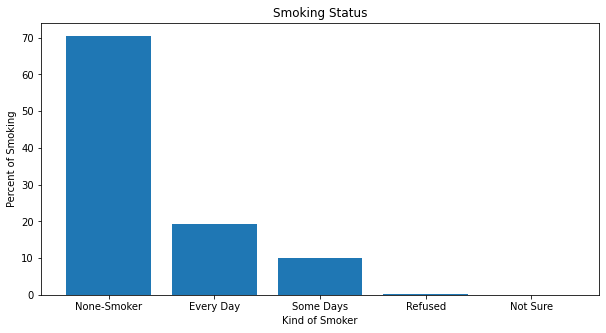

In [40]:
# code to graph those proportion of differen smoking groups using matplotlib
# create graphic to compare chronically sick by state
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(pct_smoking.index, pct_smoking.values)

# Set the x-axis tick labels to the country names

# Set the y-axis label
ax.set_xlabel('Kind of Smoker')
ax.set_ylabel('Percent of Smoking')
ax.set_title('Smoking Status')


plt.show()

In [41]:
gos = df.groupby(['State', 'smoking'])['Phys_hlth'].count()
gos.loc[: ,['Non-Smoker']].values

array([], dtype=int64)

In [42]:
gos.unstack()

smoking,Every Day,None-Smoker,Not Sure,Refused,Some Days
State,,,,,
Conneticut,706,3166,2,6,344
New Jersey,901,3249,1,2,480
New York,1004,3079,3,13,512


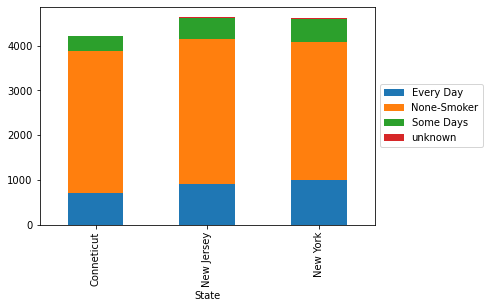

In [43]:
unst = gos.unstack()
unst['unknown'] = unst['Refused']+unst['Not Sure']
#create new column combining refused and note sure
unst.drop(columns=['Refused', 'Not Sure'], inplace=True)
# drops the refused and not sure
unst.plot(kind='bar', stacked = True, legend = 1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<AxesSubplot:xlabel='smoking'>

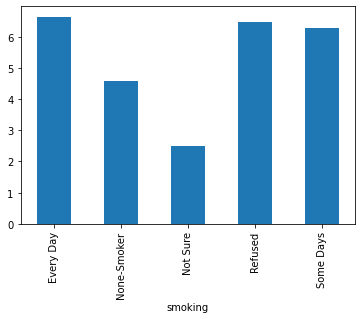

In [44]:
# code to graph these averages sick days for each category of smoking status
df.groupby('smoking')['Phys_hlth'].mean().plot(kind = 'bar')


In [45]:
sm_means = df.groupby('smoking')['Phys_hlth'].mean()
sm_means

smoking
Every Day      6.653007
None-Smoker    4.581841
Not Sure       2.500000
Refused        6.476190
Some Days      6.295659
Name: Phys_hlth, dtype: float64

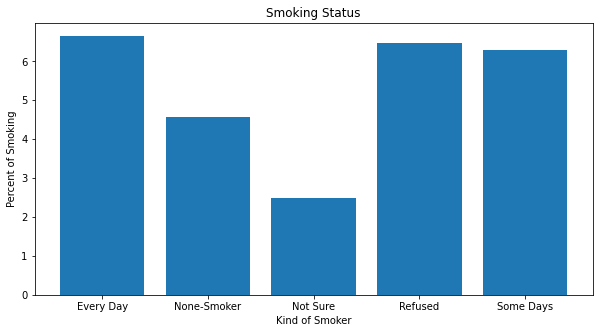

In [46]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(sm_means.index, sm_means.values)

# Set the x-axis tick labels to the country names

# Set the y-axis label
ax.set_xlabel('Kind of Smoker')
ax.set_ylabel('Percent of Smoking')
ax.set_title('Smoking Status')


plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [47]:
df['ALCDAY5']

49942     101.0
49944     230.0
49946     888.0
49951     888.0
49954     202.0
          ...  
303768    201.0
303769    102.0
303773    208.0
303774    203.0
303776    204.0
Name: ALCDAY5, Length: 13468, dtype: float64

In [48]:
df['ALCDAY5'].value_counts().sum()

13301

In [49]:
#descriptive statistics of cleaned data
df = df[(df['ALCDAY5'] != 777.00) & (df['ALCDAY5']!= 999.0)]
#Drops the 777 and 999 value 

In [50]:
df.dropna(subset = ['ALCDAY5'], inplace = True)

In [51]:
conditions = [
    (df['ALCDAY5'] >= 101.0) & (df['ALCDAY5'] <= 107.0),
    (df['ALCDAY5'] >= 201.0) & (df['ALCDAY5'] <= 230.0),
    df['ALCDAY5'] == 888.0
            ]
                                 
choice = [(df['ALCDAY5'] - 100.0)*4.0,
          df['ALCDAY5'] - 200.0,
          0.0]
                                 
df['ALCDAY5'] = np.select(conditions, choice, default = "test")                    
                                 

In [53]:
df['ALCDAY5'].value_counts()

0.0     4891
1.0     1145
4.0     1085
2.0      917
30.0     743
8.0      681
3.0      509
5.0      473
20.0     471
28.0     454
12.0     426
10.0     341
15.0     260
16.0     184
6.0      156
25.0     122
7.0      104
24.0      65
14.0      23
29.0      17
27.0      10
9.0        9
26.0       9
21.0       9
18.0       6
13.0       4
22.0       4
17.0       3
11.0       3
23.0       2
19.0       1
Name: ALCDAY5, dtype: int64

In [54]:
df['ALCDAY5'].describe()

count     13127
unique       31
top         0.0
freq       4891
Name: ALCDAY5, dtype: object

In [56]:
df['ALCDAY5'] = pd.to_numeric(df['ALCDAY5'])
df['ALCDAY5'].describe()

count    13127.000000
mean         6.452883
std          9.229524
min          0.000000
25%          0.000000
50%          2.000000
75%          8.000000
max         30.000000
Name: ALCDAY5, dtype: float64

<AxesSubplot:ylabel='Frequency'>

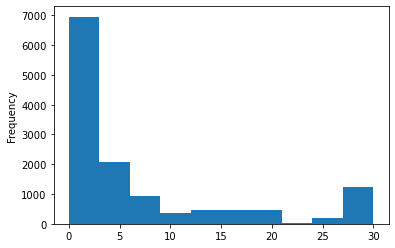

In [57]:
# graphic showing the histogram of data
df['ALCDAY5'].plot(kind = 'hist')

In [58]:
# code to calculate averages per state
df.groupby('State')['ALCDAY5'].mean()

State
Conneticut    7.070056
New Jersey    6.009921
New York      6.335045
Name: ALCDAY5, dtype: float64

In [ ]:
help(np.corrcoe)

In [60]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
np.corrcoef(df['ALCDAY5'], df['Phys_hlth'])

array([[ 1.        , -0.11778891],
       [-0.11778891,  1.        ]])

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.